<a href="https://colab.research.google.com/github/IvanDegtyarev05/BTE-320/blob/main/Pandas_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis assignment (20 points)

You have been given the dataset `travel-times` in a CSV format. This dataset comes from a driver that uses an app to track GPS coordinates as he drives to work and back each day. The app collects the location and elevation data. In total, data for about 200 trips are summarized in this data set.

Load the `travel-times` in a `df` variable using `pandas` and then perform the following:
- print the shape of the dataset **(1 points)**
- print the first 15 rows of the dataset **(1 points)**
- get information for the features (columns) with missing values **(1 points)**
- drop duplicate values (if any) by keeping only the last instance **(1 points)**
- calculate the total number of missing values (if any) on each column **(2 points)**
- create two copies of the dataframe, and then:
    - drop rows with missing values from the 1st copy **(1 points)**
    - drop columns with missing values from the 2nd copy **(1 points)**
- get summary statistics and see the correlation between the numerical columns **(1 points)**
- show rows 11 to 14 **(1 points)**
- create a subset with trips occurred on November 23, 2011 and January 6, 2012 **(2 points)**
- produce a scatterplot between `Distance` and `TotalTime` **(1 points)**
    * Use:
```python
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
```
- produce boxplots for `AvgSpeed` and `AvgMovingSpeed` (use different cells for each) **(2 points)**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

Shape of the dataset: (205, 13)
First 15 rows of the dataset:
          Date StartTime  DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
0     1/6/2012     16:37     Friday    Home     51.29     127.4      78.3   
1     1/6/2012     08:20     Friday     GSK     51.63     130.3      81.8   
2     1/4/2012     16:17  Wednesday    Home     51.27     127.4      82.0   
3     1/4/2012     07:53  Wednesday     GSK     49.17     132.3      74.2   
4     1/3/2012     18:57    Tuesday    Home     51.15     136.2      83.4   
5     1/3/2012     07:57    Tuesday     GSK     51.80     135.8      84.5   
6     1/2/2012     17:31     Monday    Home     51.37     123.2      82.9   
7     1/2/2012     07:34     Monday     GSK     49.01     128.3      77.5   
8   12/23/2011     08:01     Friday     GSK     52.91     130.3      80.9   
9   12/22/2011     17:19   Thursday    Home     51.17     122.3      70.6   
10  12/22/2011     08:16   Thursday     GSK     49.15     129.4      74.0   
11  12/21/2011

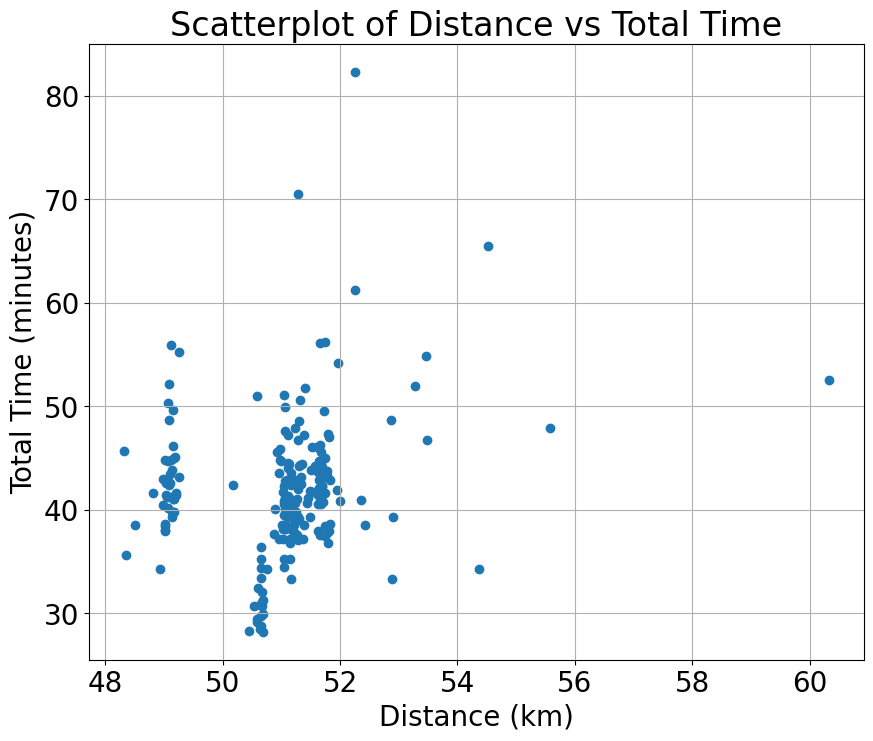

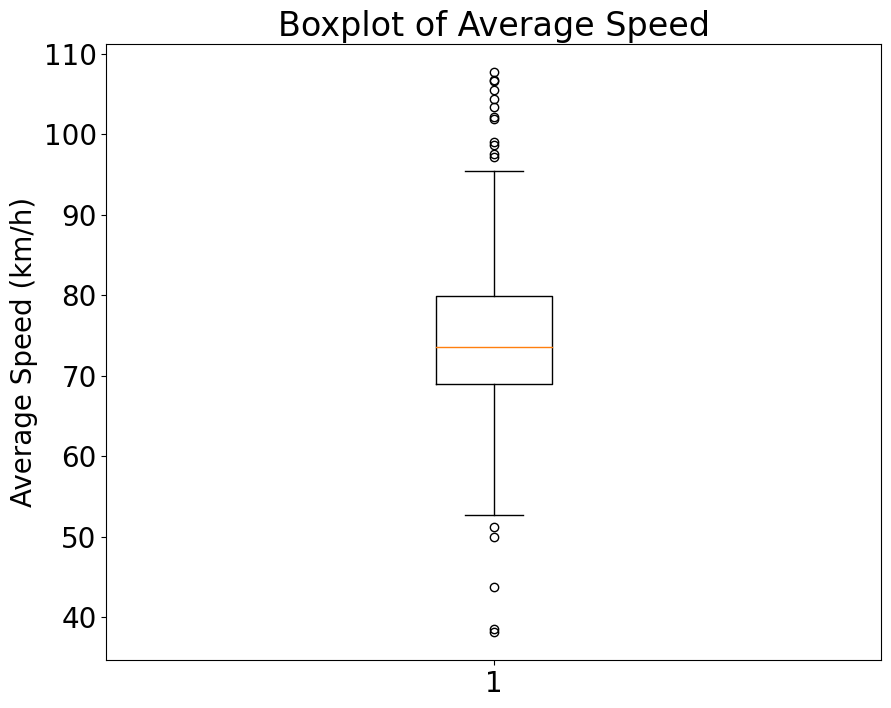

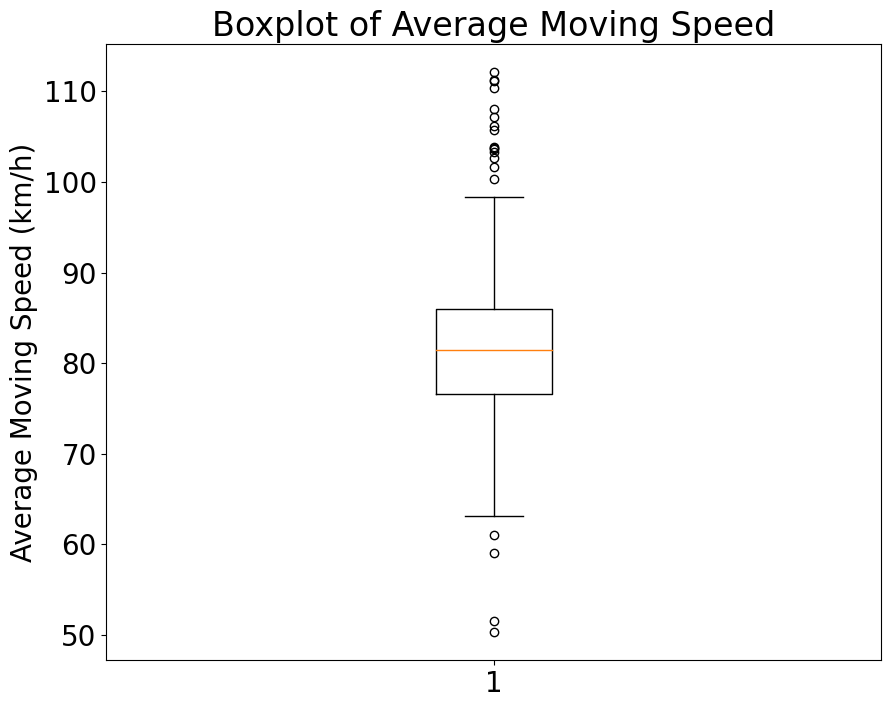

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

df = pd.read_csv('travel-times.csv')

df['FuelEconomy'] = pd.to_numeric(df['FuelEconomy'], errors='coerce')

print("Shape of the dataset:", df.shape)

print("First 15 rows of the dataset:")
print(df.head(15))

missing_values_info = df.isna().sum()
missing_values_info = missing_values_info[missing_values_info > 0]
print("Columns with missing values:")
print(missing_values_info)

df.drop_duplicates(keep='last', inplace=True)

total_missing_values = df.isna().sum()
print("Total number of missing values per column:")
print(total_missing_values)

df_copy1 = df.copy()
df_copy2 = df.copy()

df_copy1.dropna(inplace=True)

df_copy2.dropna(axis=1, inplace=True)

print("Summary statistics:")
print(df.describe())

print("Correlation matrix:")
print(df.select_dtypes(include=[np.number]).corr())

print("Rows 11 to 14:")
print(df.iloc[10:14])

dates_of_interest = ["11/23/2011", "1/6/2012"]
subset_dates = df[df['Date'].isin(dates_of_interest)]
print("Subset for specific dates:")
print(subset_dates)

plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
plt.scatter(df['Distance'], df['TotalTime'])
plt.title('Scatterplot of Distance vs Total Time')
plt.xlabel('Distance (km)')
plt.ylabel('Total Time (minutes)')
plt.grid(True)
plt.show()

plt.boxplot(df['AvgSpeed'])
plt.title('Boxplot of Average Speed')
plt.ylabel('Average Speed (km/h)')
plt.show()

plt.boxplot(df['AvgMovingSpeed'])
plt.title('Boxplot of Average Moving Speed')
plt.ylabel('Average Moving Speed (km/h)')
plt.show()